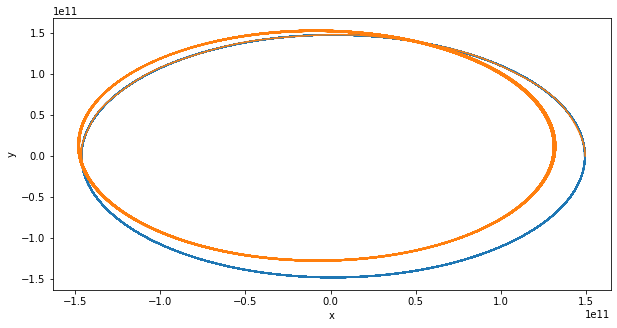

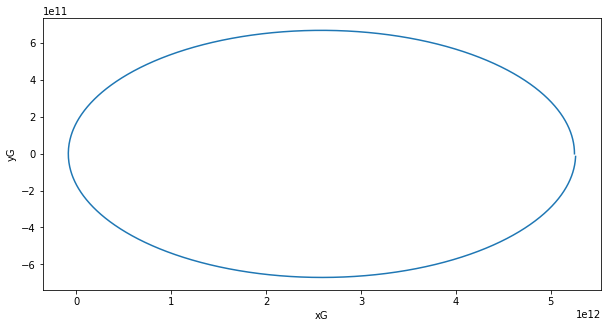

In [9]:
from numpy import zeros, sqrt, pi
from matplotlib.pyplot import plot, figure, xlabel, ylabel


def f(u) :
    f = zeros(12)
    f[0] = u[2]
    f[1] = u[3]
    f[2] = -GM_sun*u[0]/sqrt(u[0]**2 + u[1]**2)**3 + GM_moon*(u[4]-u[0])/sqrt((u[0]-u[4])**2 + (u[1]-u[5])**2)**3 + GMg*(u[8]-u[0])/sqrt((u[0]-u[8])**2 + (u[1]-u[9])**2)**3
    f[3] = -GM_sun*u[1]/sqrt(u[0]**2 + u[1]**2)**3 + GM_moon*(u[5]-u[1])/sqrt((u[0]-u[4])**2 + (u[1]-u[5])**2)**3 + GMg*(u[9]-u[1])/sqrt((u[0]-u[8])**2 + (u[1]-u[9])**2)**3
    f[4] = u[6]
    f[5] = u[7]
    f[6] = -GM_sun*u[4]/sqrt(u[4]**2 + u[5]**2)**3 + GM_earth*(u[0]-u[4])/sqrt((u[0]-u[4])**2 + (u[1]-u[5])**2)**3 + GMg*(u[8]-u[4])/sqrt((u[4]-u[8])**2 + (u[5]-u[9])**2)**3
    f[7] = -GM_sun*u[5]/sqrt(u[4]**2 + u[5]**2)**3 + GM_earth*(u[1]-u[5])/sqrt((u[0]-u[4])**2 + (u[1]-u[5])**2)**3 + GMg*(u[9]-u[5])/sqrt((u[4]-u[8])**2 + (u[5]-u[9])**2)**3
    f[8] = u[10]
    f[9] = u[11]
    f[10] = -GM_sun*u[8]/sqrt(u[8]**2 + u[9]**2)**3 + GM_earth*(u[0]-u[8])/sqrt((u[0]-u[8])**2 + (u[1]-u[9])**2)**3 + GM_moon*(u[4]-u[8])/sqrt((u[4]-u[8])**2 + (u[5]-u[9])**2)**3
    f[11] = -GM_sun*u[9]/sqrt(u[8]**2 + u[9]**2)**3 + GM_earth*(u[1]-u[9])/sqrt((u[0]-u[8])**2 + (u[1]-u[9])**2)**3 + GM_moon*(u[5]-u[9])/sqrt((u[4]-u[8])**2 + (u[5]-u[9])**2)**3
    return f


t_0 = 0; T1 = 365*24*3600; T2 = 27*24*3600
xe_0 = 149e9; ye_0 = 0
vxe_0 = 0; vye_0 = 2*pi*xe_0/T1
xm_0 = 384e6+xe_0; ym_0 = 0
vxm_0 = 0; vym_0 = 2*pi*xe_0/T1 + 2*pi*(xm_0-xe_0)/T2
xg_0 = 5.25e12; yg_0 = 0
vxg_0 = 0; vyg_0 = 900
GM_sun = 6.67408*1.98892e19; GM_earth = 6.67408*5.9742e13; GM_moon = 7.36*6.67408e11; GMg = 2.2*6.67408e3
T = T1*75
N = 10000
dt = (T-t_0)/N
u = zeros((N+1, 12))
u[0] = [xe_0, ye_0, vxe_0, vye_0, xm_0, ym_0, vxm_0, vym_0, xg_0, yg_0, vxg_0, vyg_0]


for n in range(N) :
    w_1 = f(u[n])
    w_2 = f(u[n] + w_1*dt/2)
    w_3 = f(u[n] + w_2*dt/2)
    w_4 = f(u[n] + w_3*dt)
    u[n+1] = u[n] + dt/6*(w_1 + 2*w_2 + 2*w_3 + w_4)


figure(figsize=(10, 5))
xlabel('x')
ylabel('y')
plot(u[:,0], u[:,1])
plot(u[:,4], u[:,5])

figure(figsize=(10, 5))
xlabel('xG')
ylabel('yG')
plot(u[:,8], u[:,9])

